# 📈 Part 16: Seaborn Regression Plots (`regplot` & `lmplot`)

**Goal:** Learn to visualize linear relationships and trends in data using Seaborn's powerful regression plot functions: `sns.regplot` (Axes-level) and `sns.lmplot` (Figure-level).

---

### Key Learning Objectives
1.  Understand how `sns.regplot()` combines a scatterplot with a linear regression line and confidence interval.
2.  Customize the scatter (`scatter_kws`) and line (`line_kws`) elements of a `regplot`.
3.  Learn the difference between **Axes-level** (`regplot`) and **Figure-level** (`lmplot`).
4.  Use `sns.lmplot()` with `hue`, `col`, and `row` to create multi-dimensional regression dashboards.
5.  Build a dashboard to find and visualize the strongest predictors of a target variable (e.g., Survival).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set Seaborn theme
sns.set_theme(style="whitegrid") 

print("🎯 LAB 16.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
titanic_df = pd.DataFrame({
    'Age': [22, 38, 26, 35, 54, 2, 27, 14, 58, 20, 39, 55, 31, 25, 40, 66, 28, 42, 21, 18],
    'Fare': [7.25, 71.28, 7.92, 53.10, 51.86, 21.08, 11.13, 30.07, 26.55, 8.05, 31.0, 16.0, 26.0, 7.90, 227.52, 10.5, 26.0, 13.0, 7.74, 7.05],
    'Pclass': [3, 1, 3, 1, 1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 3, 3, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
})

# We'll drop rows where 'Age' is missing for this analysis
titanic_df = titanic_df.dropna(subset=['Age'])

print("✅ Titanic data loaded and cleaned.")

🎯 LAB 16.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Titanic data loaded and cleaned.


## 1. Basic Regression Plot (`sns.regplot`)

`sns.regplot()` is the fastest way to visualize a linear trend. It automatically creates a scatterplot of two variables (`x` and `y`) and fits a linear regression model, plotting the resulting line and a 95% confidence interval.

🎯 LAB 16.2: Basic `sns.regplot`



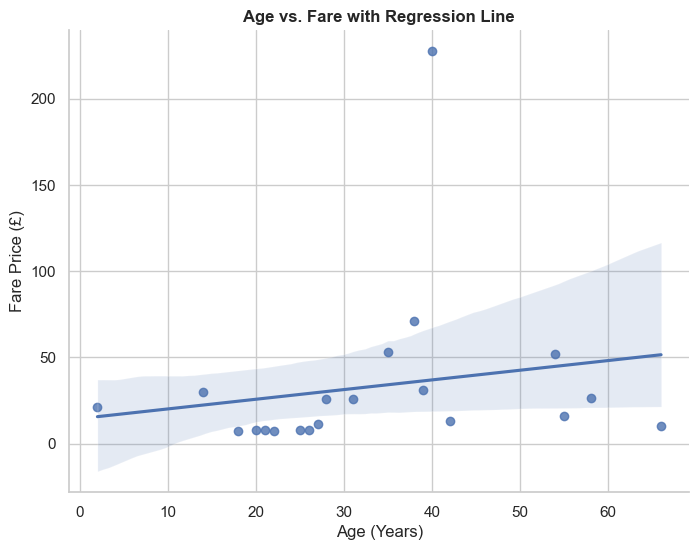


✅ Lab 1 Complete!


In [2]:
print("🎯 LAB 16.2: Basic `sns.regplot`\n")

plt.figure(figsize=(8, 6))

# This one function creates the scatter, calculates the regression,
# and plots the line with its confidence interval.
ax = sns.regplot(data=titanic_df, x='Age', y='Fare')

ax.set_title('Age vs. Fare with Regression Line', fontweight='bold')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Fare Price (£)')

sns.despine()
plt.show()

print("\n✅ Lab 1 Complete!")

## 2. Customizing `regplot`

You can pass dictionaries of keywords to style the scatter and line elements separately.

* `scatter_kws={...}`: Customizes the scatterplot (e.g., `alpha`, `s` for size, `color`).
* `line_kws={...}`: Customizes the regression line (e.g., `color`, `linestyle`).

🎯 LAB 16.3: Customizing `regplot` Elements



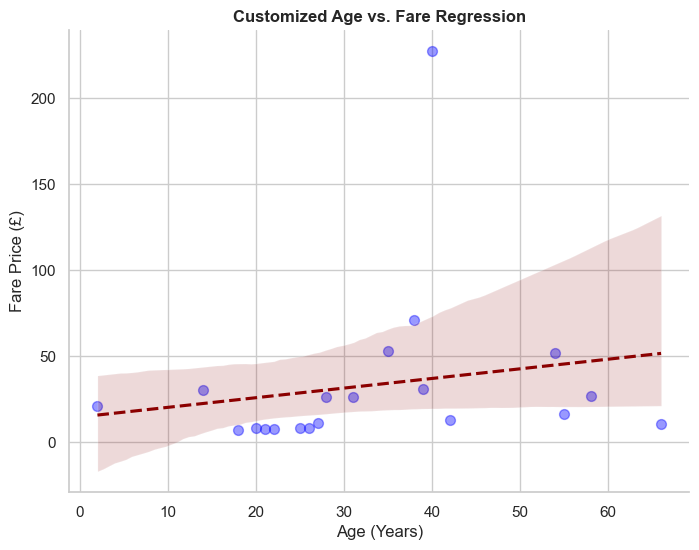


✅ Lab 2 Complete!


In [4]:
print("🎯 LAB 16.3: Customizing `regplot` Elements\n")

plt.figure(figsize=(8, 6))

ax = sns.regplot(
    data=titanic_df, 
    x='Age', 
    y='Fare',
    scatter_kws={'alpha': 0.4, 'color': 'blue', 's': 50}, # Make scatter dots lighter
    line_kws={'color': 'darkred', 'linestyle': '--'}    # Make line red and dashed
)

ax.set_title('Customized Age vs. Fare Regression', fontweight='bold')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Fare Price (£)')

sns.despine()
plt.show()

print("\n✅ Lab 2 Complete!")

## 3. Figure-Level Plotting with `sns.lmplot` (and `hue`)

`sns.lmplot()` is the **Figure-level** version of `regplot`. It is more powerful because it can create entire grids of plots using `hue`, `col`, and `row`.

* `sns.regplot()` is an Axes-level function.
* `sns.lmplot()` is a Figure-level function.

Here, we'll use `hue` to automatically create *two separate regression lines* (one for Survived, one for Not Survived) on the same plot.

🎯 LAB 16.4: Using `sns.lmplot` with `hue`



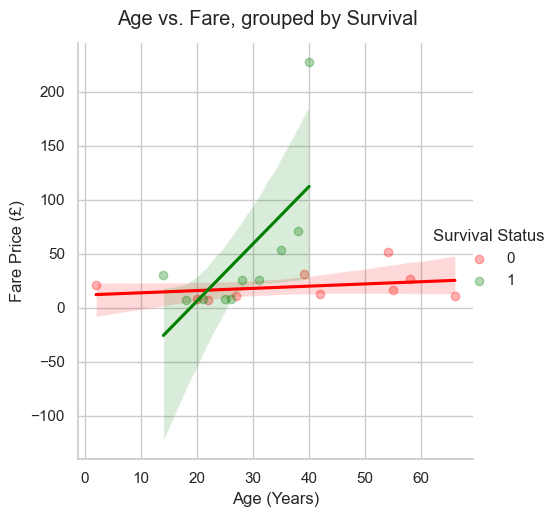


✅ Lab 3 Complete!


In [5]:
print("🎯 LAB 16.4: Using `sns.lmplot` with `hue`\n")

# lmplot creates its own Figure, so we don't use plt.figure()
g = sns.lmplot(
    data=titanic_df, 
    x='Age', 
    y='Fare', 
    hue='Survived', # Create separate regression lines and legends
    palette={0: 'red', 1: 'green'},
    scatter_kws={'alpha': 0.3}
)

g.fig.suptitle("Age vs. Fare, grouped by Survival", y=1.03)
g.set_axis_labels("Age (Years)", "Fare Price (£)")
g.legend.set_title("Survival Status")

plt.show()

print("\n✅ Lab 3 Complete!")

## 4. Multi-Plot Faceting with `lmplot`

This is the true power of Figure-level functions. `lmplot` can create an entire dashboard of plots using the `col` and `row` parameters.

Here, we'll create three separate regression plots: one for each `Pclass`.

🎯 LAB 16.5: Faceting with `col` in `lmplot`



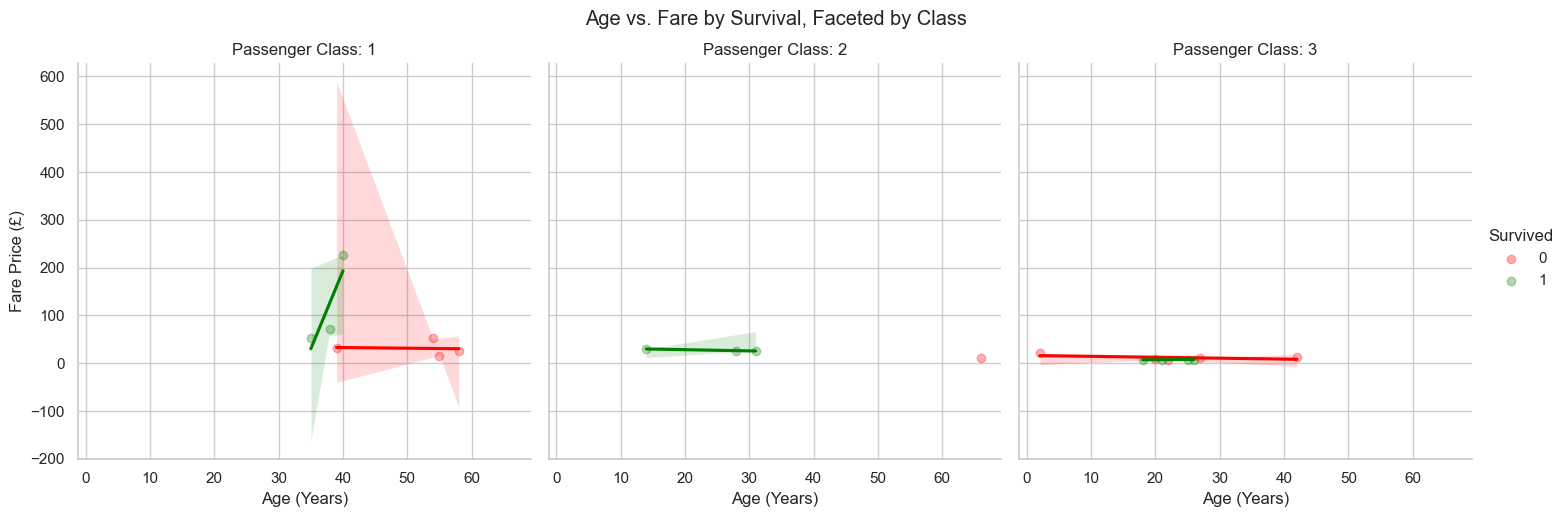


✅ Lab 4 Complete!


In [6]:
print("🎯 LAB 16.5: Faceting with `col` in `lmplot`\n")

# `col='Pclass'` automatically creates 3 subplots, one for each class
g = sns.lmplot(
    data=titanic_df, 
    x='Age', 
    y='Fare', 
    col='Pclass', # Creates 3 columns
    hue='Survived',
    palette={0: 'red', 1: 'green'},
    scatter_kws={'alpha': 0.3}
)

g.fig.suptitle("Age vs. Fare by Survival, Faceted by Class", y=1.03)
g.set_axis_labels("Age (Years)", "Fare Price (£)")
g.set_titles("Passenger Class: {col_name}") # {col_name} is a placeholder

plt.show()

print("\n✅ Lab 4 Complete!")

## 5. Practice Project: Survival Predictor Dashboard

Let's build a final dashboard to find the best predictors of survival. We will:
1.  Calculate a correlation matrix with Pandas.
2.  Plot the correlations as a `sns.heatmap`.
3.  Plot the strongest relationship (`Fare` vs `Survived`) as a `sns.regplot`.

🎯 LAB 16.6: PRACTICE PROJECT - Survival Predictor Dashboard

💾 Dashboard saved as 'seaborn_part16_regression_dashboard.png'


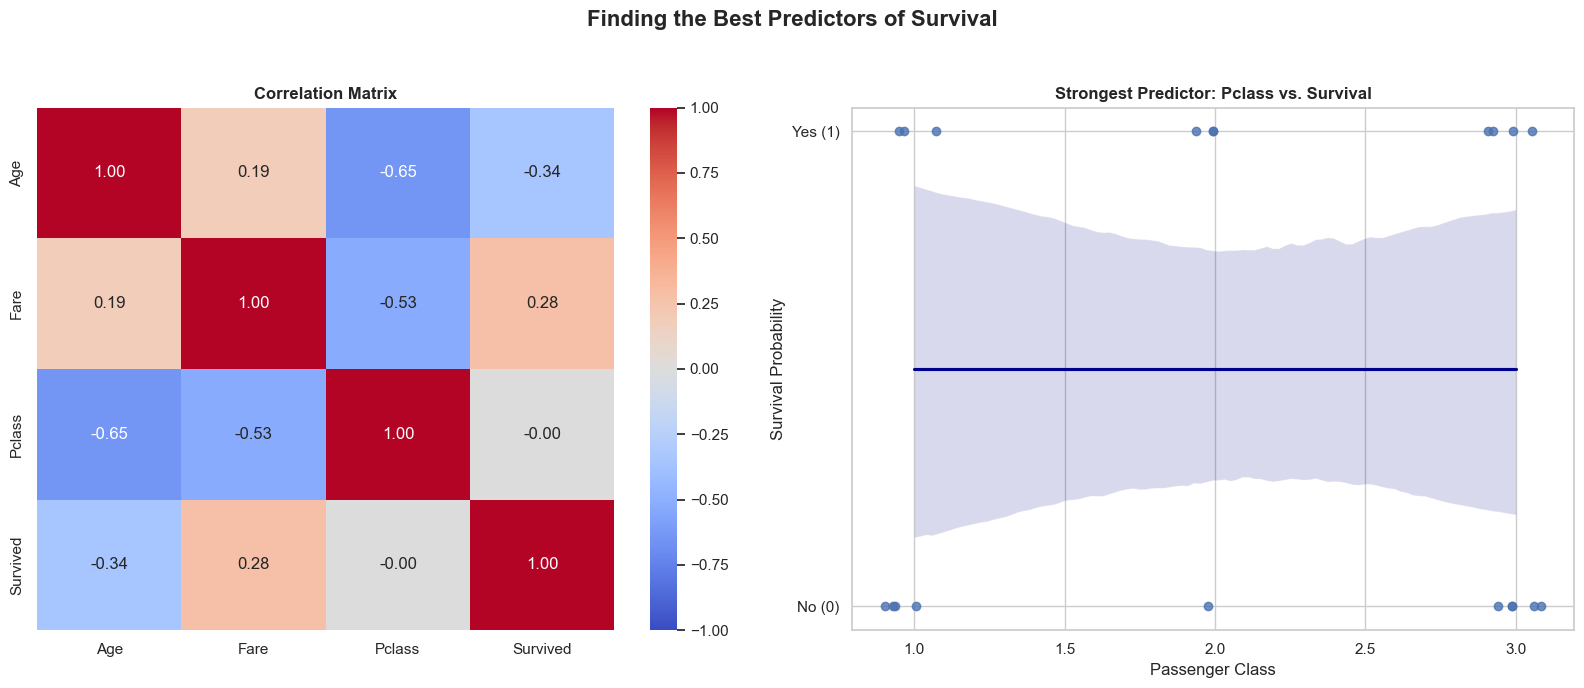


--- INSIGHTS FROM PLOT ---
Feature Correlation with Survival (Sorted):
1. Fare      : +0.280
   → Higher Fare = Higher survival
2. Pclass    : -0.000
   → Higher Pclass = Lower survival
3. Age       : -0.345
   → Higher Age = Lower survival

💡 KEY INSIGHTS:
• Best predictor: Fare (r=+0.280)
• Weakest predictor: Age (r=-0.345)

✅ Lab 5 Complete!
🎉 Part 16 Complete: You can find trends and make predictions!


In [7]:
print("🎯 LAB 16.6: PRACTICE PROJECT - Survival Predictor Dashboard\n")

# 1. Calculate Correlation (Pandas)
numeric_cols = ['Age', 'Fare', 'Pclass', 'Survived']
corr_matrix = titanic_df[numeric_cols].corr(numeric_only=True)
survival_corr = corr_matrix['Survived'].drop('Survived').sort_values(ascending=False)

# 2. Create the Figure and Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Finding the Best Predictors of Survival', fontsize=16, fontweight='bold')

# 3. Plot 1: Correlation Heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm',
    vmin=-1, vmax=1,
    ax=ax1
)
ax1.set_title('Correlation Matrix', fontweight='bold')

# 4. Plot 2: Regplot of the Strongest Predictor
# We use Pclass (a number) for x and Survived (0 or 1) for y
# `x_jitter` adds a little noise to the x-values to see overlapping points
sns.regplot(
    data=titanic_df, 
    x='Pclass', 
    y='Survived',
    ax=ax2,
    x_jitter=0.1, # Jitter points to see them better
    logistic=True, # Use a logistic curve (better for 0/1 data)
    line_kws={'color': 'darkblue'}
)
ax2.set_title('Strongest Predictor: Pclass vs. Survival', fontweight='bold')
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Survival Probability')
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['No (0)', 'Yes (1)'])

# 5. Save and Show
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('seaborn_part16_regression_dashboard.png', dpi=300)
print("💾 Dashboard saved as 'seaborn_part16_regression_dashboard.png'")
plt.show()


# 6. Print Summary Insights
print("\n--- INSIGHTS FROM PLOT ---")
sorted_corr = list(zip(survival_corr.index, survival_corr.values))

print("Feature Correlation with Survival (Sorted):")
for i, (feature, corr) in enumerate(sorted_corr, 1):
    print(f"{i}. {feature:10}: {corr:+.3f}")
    if corr > 0:
        print(f"   → Higher {feature} = Higher survival")
    else:
        print(f"   → Higher {feature} = Lower survival")

print("\n💡 KEY INSIGHTS:")
print(f"• Best predictor: {sorted_corr[0][0]} (r={sorted_corr[0][1]:+.3f})")
print(f"• Weakest predictor: {sorted_corr[-1][0]} (r={sorted_corr[-1][1]:+.3f})")

print("\n✅ Lab 5 Complete!")
print("🎉 Part 16 Complete: You can find trends and make predictions!")